# unbounded knapsack problem question with example :
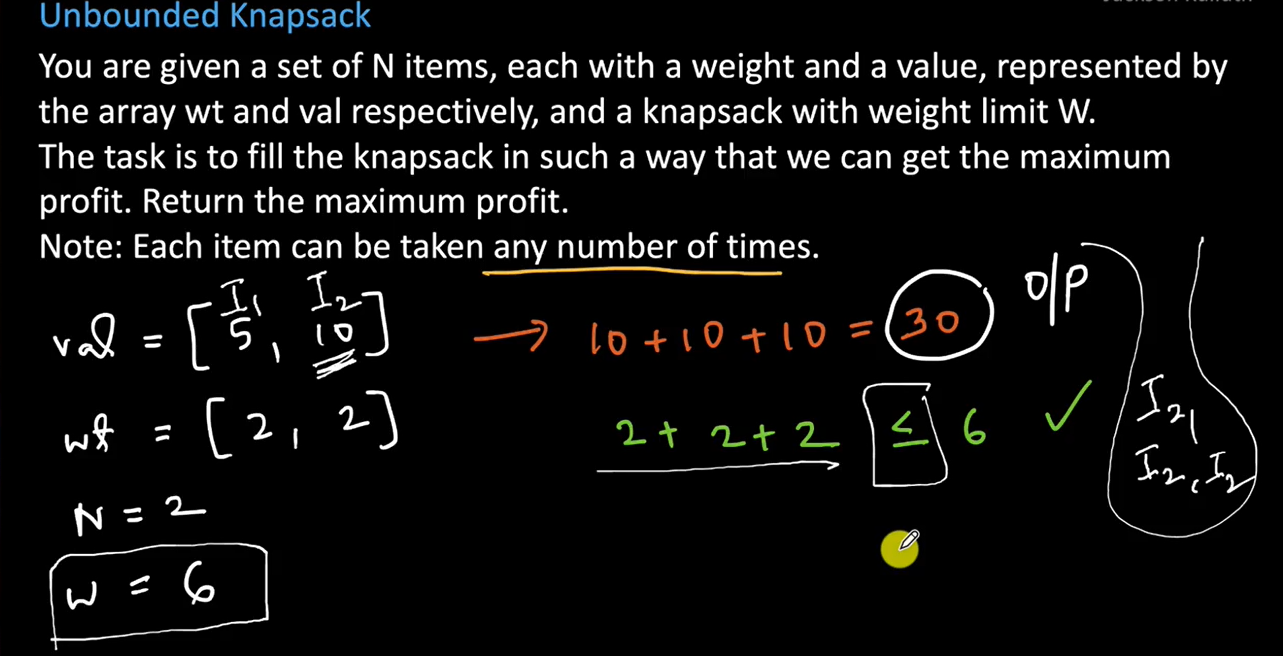
# unbounded knapsack problem statement :
- Given a set of N items, each with a weight and a value, represented by the array w and val respectively. Also, a knapsack with weight limit W.

- The task is to fill the knapsack in such a way that we can get the maximum profit. Return the maximum profit.

- Note: Each item can be taken any number of times.



- Input: 

N = 2

W = 3

val = [4, 2]

wt = [3, 1]

- Output: 3
Explanation: 

1.Pick the 2nd element thrice.

So, Total value = 2 + 2 + 2 = 6. and the total weight = 1 + 1 + 1  = 3 

which is <= 3.

# unbounded knapsack problem tabulation(bottom-up)approach :
### as here you can see here we already discussed the recursive, memoisation & tabulation approach for solvoing 0-1 knapsack problem whereas here unbounded problem is quite similar to 0-1 knapsack problem only difference is we can pick items multiple-times upto the weight-capacity of knapsack here in this unbounded variation of knapsack problem .
- so here repeatation of items allowed: means item can be included multiple times for max_value addition untill unless it satisfies the condition like : item's weight <= remaining_weight of knapsack
- here we're solving this problem through Tabulation (bottom-up) approach
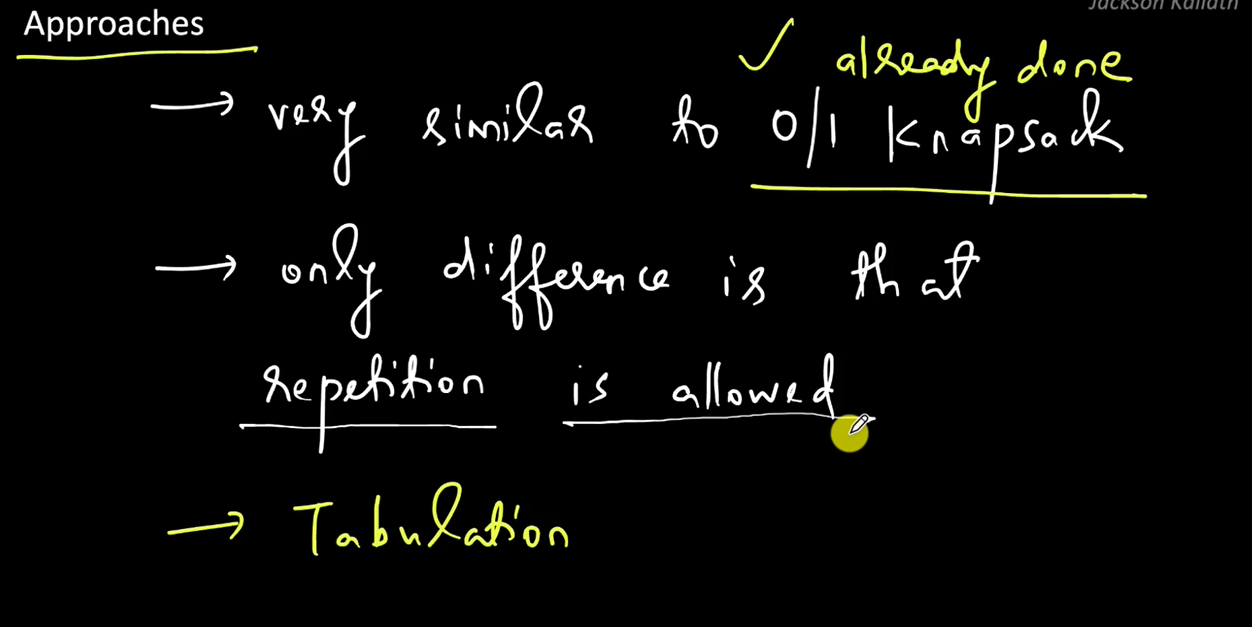
### here we're going to construct 2-d Dp_table in same fassion as we did in the case of 0-1 knapsack problem :-
### like here we're going to initialize the whole 2-d table with column W+1 alongwith rows n+1 ; and firstly going to fill zero in each cell while intializing .
### ### Here also zero-th row will remianed zero means no-item remaining to be value-added [which's also one of the base-condition : when index goes beyond items(index>n-1)] ; zeor-th column starts with zero means rem_wt is equal to zero [which's also one of the base-condition: (rem_wt == 0)] 

### now here if we want to fill the various cell which will be the max_value(exclusion(i),inclusion(i)) as solution to overlapping subproblems , which will be assigned iteratively to each cell at positions dp[i][j]
- here firstly in the case of exclusion of item; means item will be excluded then there's one item less to be included in knapsack and remianing_weight will be reamined same ; so formula will be : - exclude = dp[i-1][j]
- secondly in the case of inclusion of item ; means corresponding value of item will be added and remaining_weight will be reduced by corresponding weight of item, but here catch is "one-item less to be included further" is not true as repeatition for including item is allowed untill its satisfies the condition(wt of item<=rem_wt); so we will tires to further include same item ; and formula will be :- include = val[i-1] + dp[i][j - wt[i-1]]   //as already discussed in the 0-1knapsack through tabulation method that 'val[i-1]','wt[i-1]' is denoting same current item in value and weight array whereas 'dp[i]' here also speacifying cell-row belongs to same current item instead of just filled row of last item of dp_table 
- just like in 0-1 knapsack through tabulation(dp_table)approach here is also major solution to the problem at hand will at the far-right-bottom of dp_table which's : dp[n][W]   (where all items to be included available with rem_wt == W)
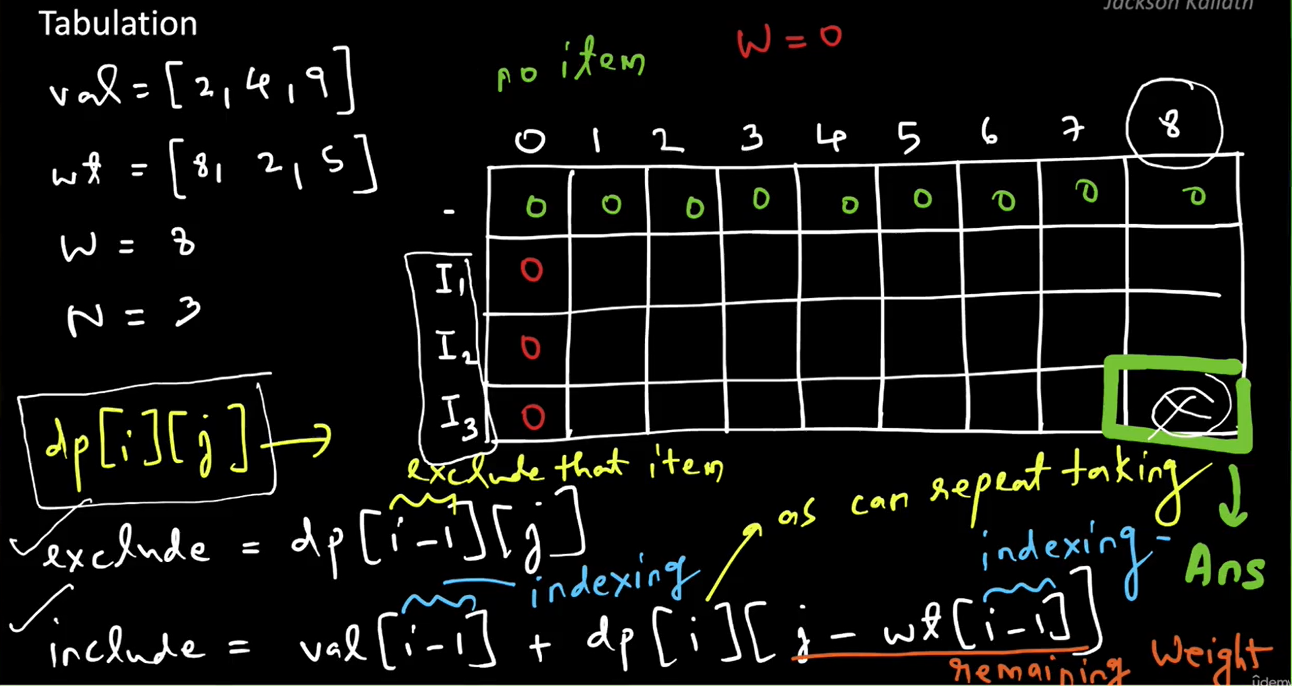

# unbounded knapsack problem tabulation(bottom-up)approach [complexity] :
### here complexity will be same as complexity of tabulation approach to solve 0-1 knapsack problem whichs :-
- tc = O(n*w) ; whereas sc = O(n*w)  [as we contrcut dp_table of w+1 colm and n+1 rows]  ; we can further optimize thr space complexity by using space_optimized tabulation approach for solving unbounded_knapsack problem here then its sc = O(w) ['coz we need only two rows ; last/prev-row and current-row]
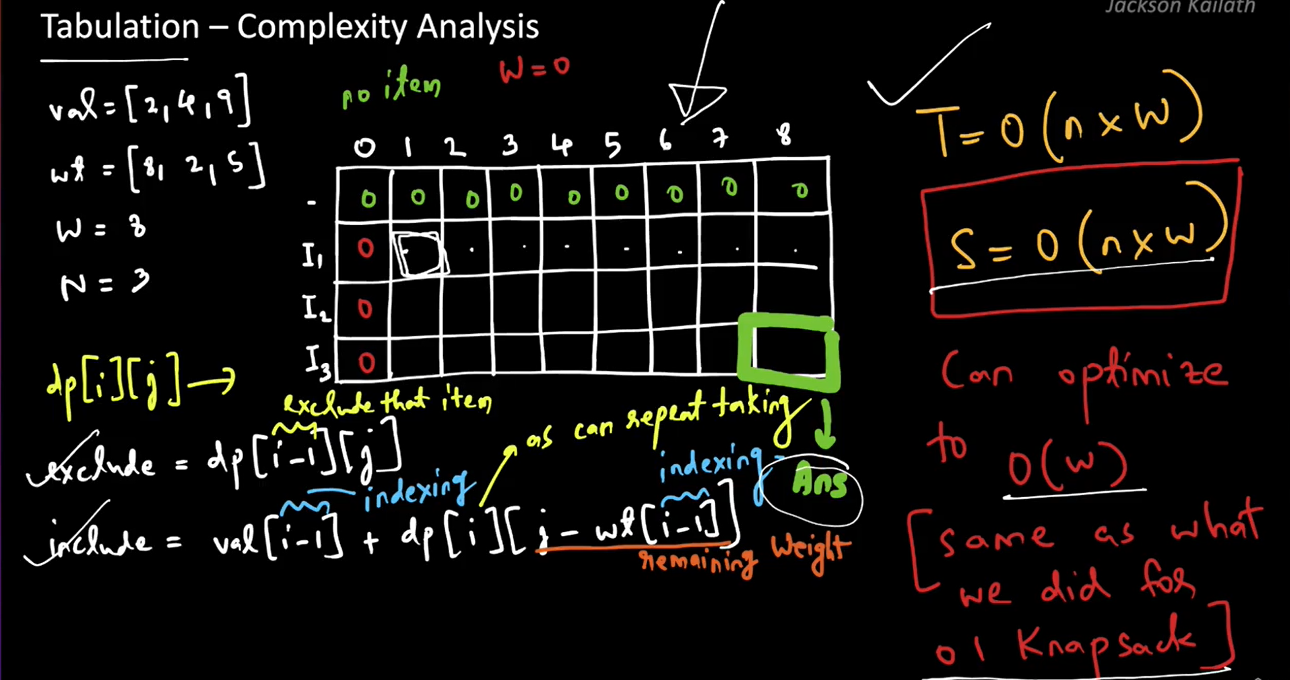
# unbounded knapsack problem tabulation(bottom-up)approach [code-implementation] :
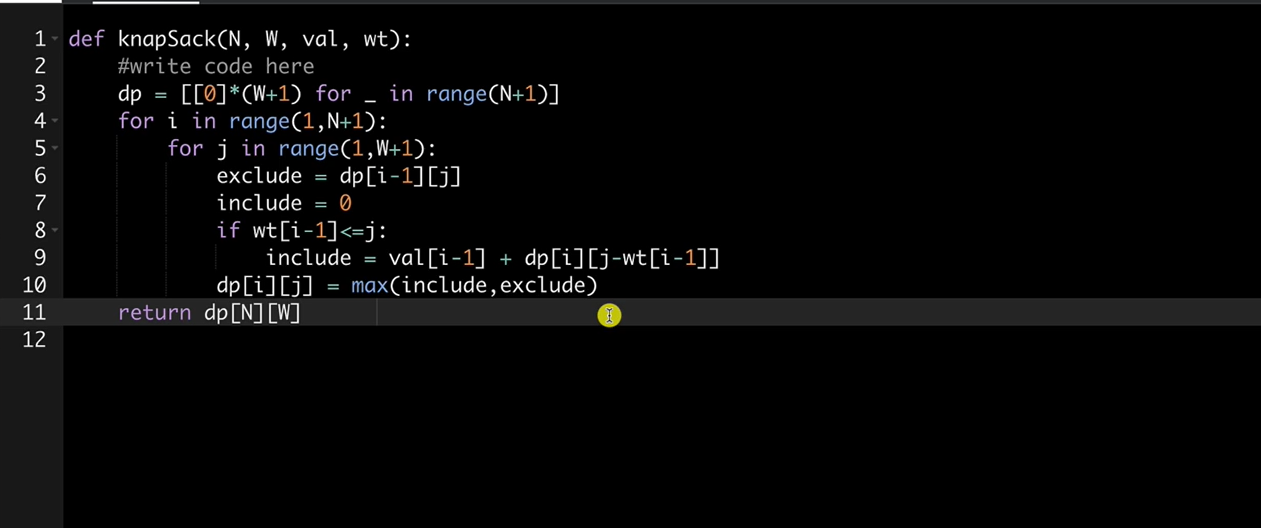

In [3]:
# unbouded_knapsack problem solving through tabulation(bottomm-up) approach. 

def unbounded_knapsack(N, W, val, wt): # N denotes number of items(also equals to the length of wt and val array)
      # here W denotes total capacity of knapsack, val and wt denotes values of items and corresponding weights of item's array
      
      # now going to construct the 2-d Dp_table
      dp = [[0]*(W+1) for _ in range(N+1)]   # intialized with zero valued cells ; table with N+1-rows and W+1 columns
      
      # as we know base-conditioned row(zero-th row where no items to be filled available ; condition i<1 or i>N-1)
      # and based conditioned column(zero-th colm where remaining weight capacity of knapsack is equal to zero ; rem_wt == 0 ;)
      # so we start iteratively from 1 index upto n+1 and assinging the max_value(solution) to the respective cell at dp[i][j] using inclusion and exclusion formula:
      for i in range(1,N+1):  # row
            for j in range(1,W+1): # column
                  #Formula for exclusion of item , where weight remained same and 1 less items available to be value-added
                  exclude = dp[i-1][j]
                  #formula for inclusion, where rem_wt will be reduced by corresponding wt of item, value of item will be added and repeatition of inclusion of item is allowed.
                  include = 0  #inclusion: [here as we already know we have to initialise the include with value zero for comparision purpose]
                  if wt[i-1] <= j:
                        include = val[i-1] + dp[i][j - wt[i-1]]
                  dp[i][j]=max(exclude,include)  # assigning value to respective cell at dp[i][j]
      
      # now finally we have to retuurn the major solution to the problem at hamd ; which will be at far-right-bottom of dp_table; dp[N][W]
      return dp[N][W]

# exampe usage for unbounded knapsack:
val = [2,4,9]  # values of item
wt = [8,2,5]  # wieghts of item
N = 3 #total items
W = 8 #total capacity of knapsack 
print(unbounded_knapsack(N,W,val,wt))  
# should be 16 as i2 can be included 4-times (as its unit weight is 2 and collectively it wil be weighted as 8 <=W); 
#so max_value to be added will be 4times of unit_value of i2 = 4*4 =16 [ans]
                        
            
       

16


In [2]:
def knapSack(N, W, val, wt):
    # code here
    dp = [[-1]*(W+1) for _ in range(N+1)]
    
    for j in range(W+1):
        dp[0][j] = 0
    
    for i in range(N+1):
        dp[i][0] = 0
    
    for i in range(1,N+1):
        for j in range(1,W+1):
            exclude = dp[i-1][j]
            include = 0
            if wt[i-1] <=j:
                include = val[i-1] + dp[i][j -wt[i-1]]
            dp[i][j] = max(exclude,include)
    return dp[N][W]

# exampe usage for unbounded knapsack:
val = [2,4,9]  # values of item
wt = [8,2,5]  # wieghts of item
N = 3 #total items
W = 8 #total capacity of knapsack 
print(knapSack(N,W,val,wt))  
# should be 16 as i2 can be included 4-times (as its unit weight is 2 and collectively it wil be weighted as 8 <=W); 
#so max_value to be added will be 4times of unit_value of i2 = 4*4 =16 [ans]

16


In [1]:
# unbouded_knapsack problem solving through Space-optimized tabulation(bottomm-up) approach. 

def unbounded_knapsack1(N, W, val, wt): # N denotes number of items(also equals to the length of wt and val array)
      # here W denotes total capacity of knapsack, val and wt denotes values of items and corresponding weights of item's array
      
      # now going to construct the two rows(upto W+1 columns)
      lst_row = [0]*(W+1)  # last/previous -row 
      curr_row = [0]*(W+1)  # cureent/ongoing row
      
      
      # as we know base-conditioned row(zero-th row where no items to be filled available ; condition i<1 or i>N-1)
      # and based conditioned column(zero-th colm where remaining weight capacity of knapsack is equal to zero ; rem_wt == 0 ;)
      # so we start iteratively from 1 index upto n+1 and assinging the max_value(solution) to the respective cell at dp[i][j] using inclusion and exclusion formula:
      for i in range(1,N+1):  # row
            for j in range(1,W+1): # column
                  #Formula for exclusion of item , where weight remained same and 1 less items available to be value-added
                  exclude = lst_row[j]  # as dp[i-1] specifying the previous-row ( 1 item less to be available) ; weight remained same 
                  #formula for inclusion, where rem_wt will be reduced by corresponding wt of item, value of item will be added and repeatition of inclusion of item is allowed.
                  include = 0  #inclusion: [here as we already know we have to initialise the include with value zero for comparision purpose]
                  if wt[i-1] <= j:
                        include = val[i-1] + curr_row[j - wt[i-1]]  # as dp[i] specifying the current row (including the same item repeatatively )
                  curr_row[j]=max(exclude,include)  # assigning value to respective cell at curr_row[j]
            lst_row = curr_row[:]  #here we're swapping: last-row equals to current-row; copying the whole current-row to previous-row oncce all value filled up to W+1     
      
      # now finally we have to retuurn the major solution to the problem at hamd ; which will be at far-right of curr_row; curr_row[W]
      return curr_row[W]

# exampe usage for unbounded knapsack1:
val = [2,4,9]  # values of item
wt = [8,2,5]  # wieghts of item
N = 3 #total items
W = 8 #total capacity of knapsack 
print(unbounded_knapsack1(N,W,val,wt))  
# should be 16 as i2 can be included 4-times (as its unit weight is 2 and collectively it wil be weighted as 8 <=W); 
#so max_value to be added will be 4times of unit_value of i2 = 4*4 =16 [ans]

16
